# Imports

In [28]:
from my_import import *

path = kagglehub.dataset_download("svanoo/myanimelist-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\svanoo\myanimelist-dataset\versions\2


# Dataset analysis and cleaning

In [29]:
#Collumns that we are interested in
cols_to_use = ['anime_id', 'title', 'synopsis', 'genres' , 'score']
#Read the file while only taking certain collumns
full_df=pd.read_csv(r"C:\Users\User\.cache\kagglehub\datasets\svanoo\myanimelist-dataset\versions\2\anime.csv",
               sep='\t',
               usecols=cols_to_use)
print("Original Dataset")
print("Shape of the Dataset:",full_df.shape)
#Display fiest five columns of the dataset
display(full_df)


Original Dataset
Shape of the Dataset: (13379, 5)


,anime_id,title,synopsis,genres,score
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN
...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66


In [30]:
#Finds rows with missing synopsis
missing_synopsis = full_df[full_df['synopsis'].isnull() | (full_df['synopsis'] == ".")]
print("Finding rows with missing synopsis")
display(missing_synopsis)
print("Number of missing synopsis:",len(missing_synopsis))

#Removes the rows with missing synopsis
df_cleaned = full_df[~(full_df['synopsis'].isnull() | (full_df['synopsis'] == "."))]
print("Cleaned df")
display(df_cleaned)

#Find incomplete synopsis 


# Compute number of words for each synopsis and add in another collumn
df_cleaned.loc[:,'synopsis_word_count'] = df_cleaned['synopsis'].apply(lambda x: len(x.split()))
display(df_cleaned)
min_words=8
print("Minimum number of words in a synopsis:",min_words)

short_synopsis = df_cleaned[df_cleaned['synopsis_word_count'] < min_words]
display(short_synopsis[['title', 'synopsis', 'synopsis_word_count']])

#IMPORTANT NOTE: Removing rows based on word count may remove some meaningful synopsis.
#This problem can be solved if the model takes the anime title as the input and classifies the prompt from user based on synopsis and also anime titles
#This removes the need of data cleaning due to incomplete synopsis
#But for now, we remove every synopsis below 8 words

print("Cleaned df")
df_cleaned = df_cleaned[df_cleaned['synopsis_word_count'] >= min_words]
display(df_cleaned)


Finding rows with missing synopsis


,anime_id,title,synopsis,genres,score
6,49065,Shuimu Xuetang 2nd Season,.,Comedy|Kids,NaN
7,48335,Canimals,.,Comedy|Kids,NaN
18,51119,Grisaia: Phantom Trigger the Animation (TV),.,Action|School,NaN
19,34928,Akindo Sei no Little Peso,.,Comedy|Sci-Fi,NaN
21,45596,Kindan Joshi,.,Comedy|Romance,NaN
...,...,...,...,...,...
12681,9563,Hidamari Sketch x ☆☆☆ Specials,.,Comedy|Slice of Life|School|Seinen,7.82
12694,38154,3-gatsu no Lion: Ugoku! Nya Shogi,.,Game,6.06
12802,30533,Gundam Build Fighters Try: Island Wars,.,Action|Sci-Fi|Mecha,6.77
12889,38810,Bleach: Gotei 13 Omake,.,Action|Adventure,6.56


Number of missing synopsis: 864
Cleaned df


,anime_id,title,synopsis,genres,score
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN
...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66


C:\Users\User\AppData\Local\Temp\ipykernel_11084\2275775674.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:,'synopsis_word_count'] = df_cleaned['synopsis'].apply(lambda x: len(x.split()))


,anime_id,title,synopsis,genres,score,synopsis_word_count
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN,22
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN,48
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN,85
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN,35
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN,107
...,...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24,94
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27,8
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36,28
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66,15


Minimum number of words in a synopsis: 8


,title,synopsis,synopsis_word_count
5,Watanuki-san Chi to,Second season of .,4
12,Dungeon ni Deai wo Motomeru no wa Machigatteir...,Fourth season of .,4
17,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Second half of .,4
28,Jashin-chan Dropkick X,Third season of .,4
32,"Komi-san wa, Comyushou desu. 2nd Season",Second season of .,4
...,...,...,...
13327,Ladies versus Butlers! Tokuten Disc Music Clip,Special music clip released on DVD.,6
13328,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze...,Recaps of the series.,4
13338,Sukitte Ii na yo.: Mei and Marshmallow,Specials released with the anime BD/DVD.,6
13353,IS: Infinite Stratos 2 - Infinite Wedding,Picture drama included on the Blu-ray BOX.,7


Cleaned df


,anime_id,title,synopsis,genres,score,synopsis_word_count
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN,22
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN,48
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN,85
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN,35
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN,107
...,...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24,94
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27,8
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36,28
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66,15


In [31]:
final_cleaned_dataset_df=df_cleaned[['title', 'synopsis', 'genres']]
display(final_cleaned_dataset_df)

,title,synopsis,genres
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural
1,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure
2,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy
3,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life
4,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids
...,...,...,...
13374,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense
13375,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi
13376,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody
13377,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody


,Genre,Count
3,Comedy,4426
1,Action,3075
9,Fantasy,2382
2,Adventure,2097
18,Drama,1982
6,Sci-Fi,1909
16,Romance,1625
19,Shounen,1570
4,Slice of Life,1499
27,School,1391


Number of unique genres
['Comedy', 'Action', 'Fantasy', 'Adventure', 'Drama', 'Sci-Fi', 'Romance', 'Shounen', 'Slice of Life', 'School', 'Supernatural', 'Hentai', 'Kids', 'Historical', 'Mecha', 'Seinen', 'Mystery', 'Ecchi', 'Music', 'Shoujo', 'Sports', 'Super Power', 'Parody', 'Military', 'Demons', 'Harem', 'Horror', 'Space', 'Game', 'Martial Arts', 'Psychological', 'Avant Garde', 'Police', 'Samurai', 'Boys Love', 'Suspense', 'Vampire', 'Girls Love', 'Cars', 'Josei', 'Gourmet', 'Erotica', 'Work Life', 'Award Winning']


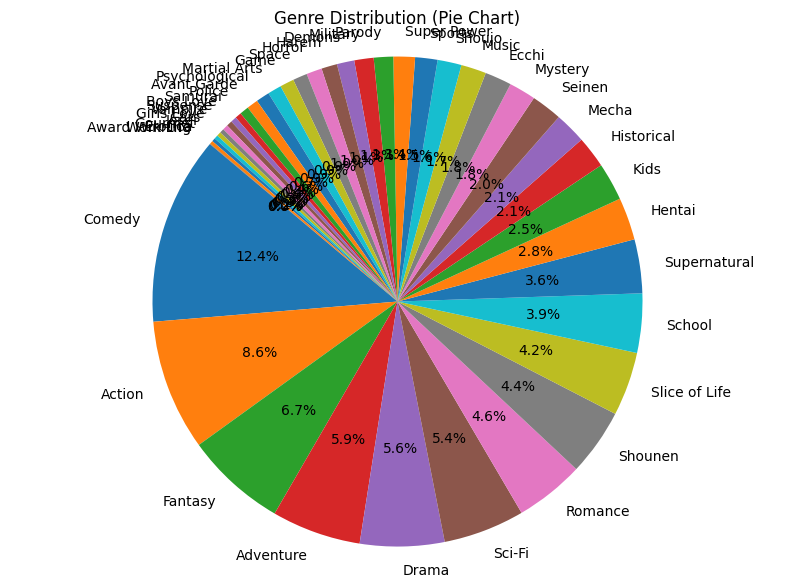

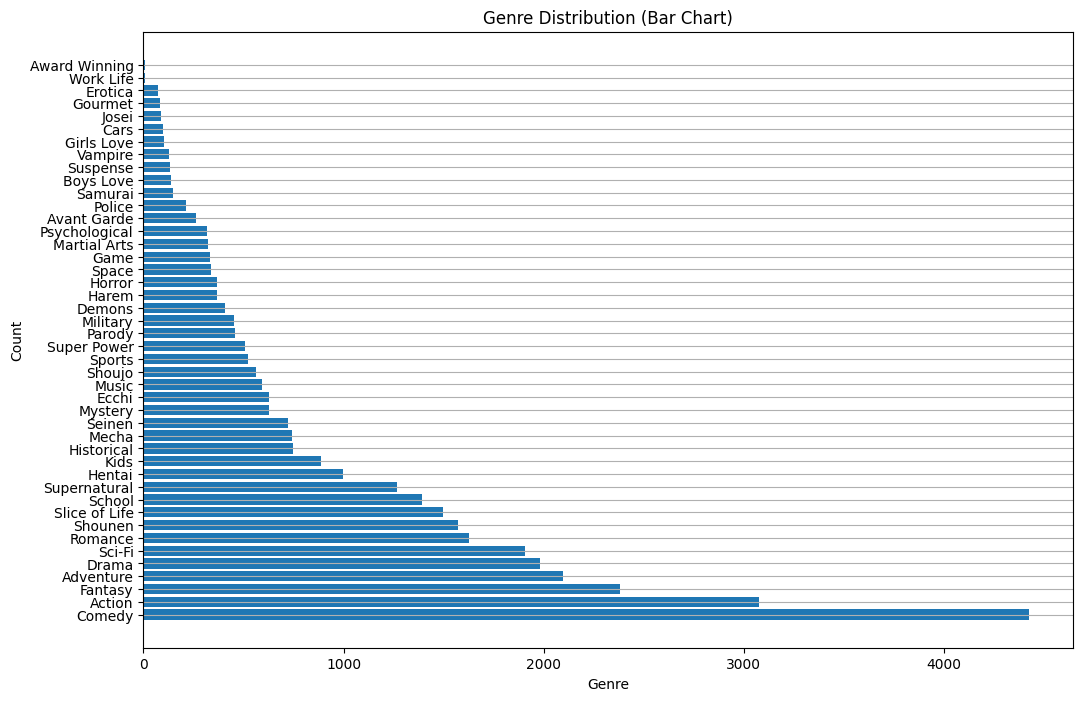

,Genre,Count
3,Comedy,4426
1,Action,3075
9,Fantasy,2382
2,Adventure,2097
18,Drama,1982
6,Sci-Fi,1909
16,Romance,1625
19,Shounen,1570
4,Slice of Life,1499
27,School,1391


In [32]:
#get the number of unique genres
df_genres=df_cleaned
# Split the genres and count occurrences
#from collections import Counter

# Flatten the list of genres after splitting each row by '|'
genre_counter = Counter(
    genre.strip() 
    for genre_list in df_genres['genres'] 
    for genre in genre_list.split('|')
)

# Display the genre counts as a DataFrame for clarity
genre_counts_df = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
display(genre_counts_df)
genre_list = genre_counts_df['Genre'].tolist()

#Print number of unique genres
print("Number of unique genres")
print(genre_list)  

# Pie chart
plt.figure(figsize=(10, 7))
plt.pie(genre_counts_df['Count'], labels=genre_counts_df['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

# Bar chart
plt.figure(figsize=(12, 8))
plt.barh(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution (Bar Chart)')
plt.grid(axis='y')
plt.show()
display(genre_counts_df)


Final list of genres


,Genre,Count,Percentage
0,Comedy,4426,12.427348
1,Action,3075,8.634003
2,Fantasy,2382,6.688193
3,Adventure,2097,5.887969
4,Drama,1982,5.565071
5,Sci-Fi,1909,5.360101
6,Romance,1625,4.562684
7,Shounen,1570,4.408255
8,Slice of Life,1499,4.208901
9,School,1391,3.905658


['Space', 'Game', 'Martial Arts', 'Psychological', 'Avant Garde', 'Police', 'Samurai', 'Boys Love', 'Suspense', 'Vampire', 'Girls Love', 'Cars', 'Josei', 'Gourmet', 'Erotica', 'Work Life', 'Award Winning']


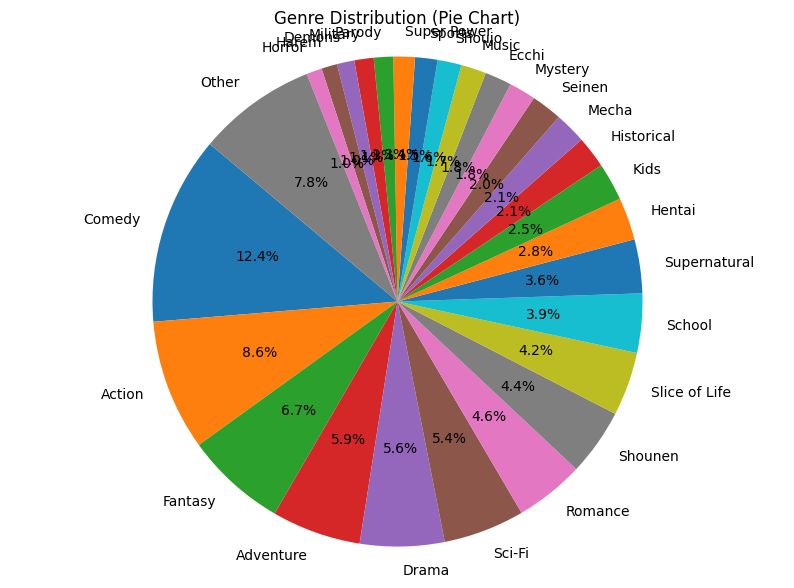

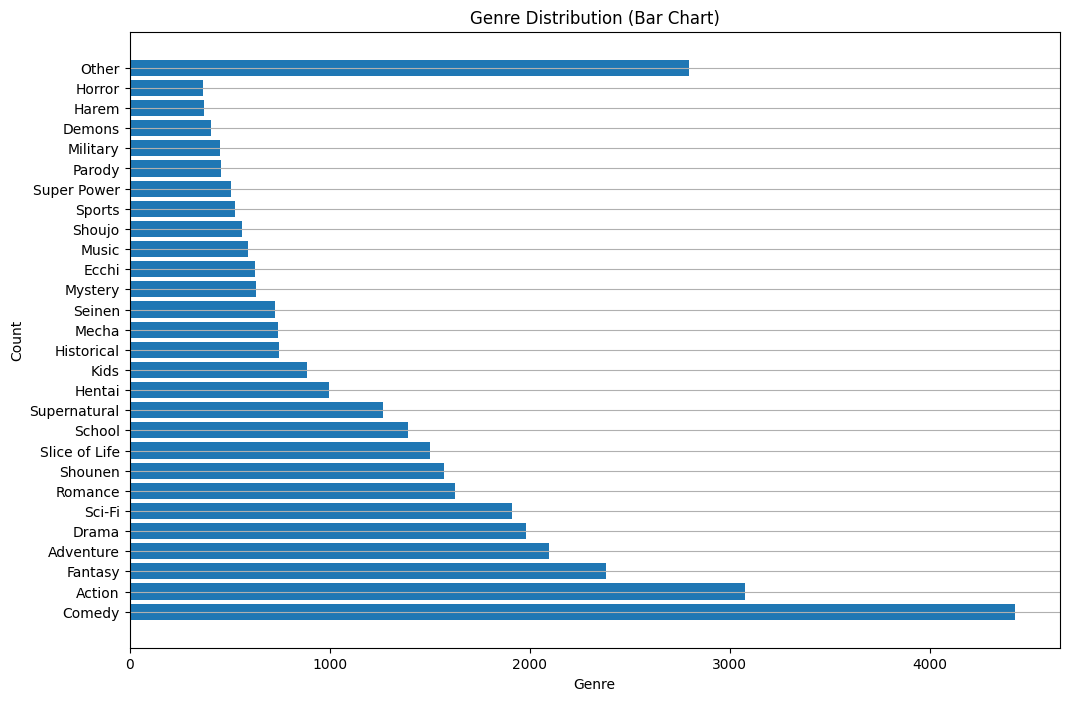

In [33]:
#Finding the percentage of each genre and separating genre smaller into Others
percentage=[]
for i in genre_counts_df["Count"]:
    percentage.append(i/genre_counts_df["Count"].sum()*100)

genre_counts_df["Percentage"]=percentage

above_1 = genre_counts_df[genre_counts_df['Percentage'] >= 1]  #can change the value of division here and see how model performs
below_1 = genre_counts_df[genre_counts_df['Percentage'] < 1]
other_row = pd.DataFrame({
    'Genre': ['Other'],
    'Count': [below_1['Count'].sum()],
    'Percentage': [below_1['Percentage'].sum()]
})

# Concatenate the dataframes
final_df = pd.concat([above_1, other_row], ignore_index=True)
final_genre_df=final_df


print("Final list of genres")
display(final_genre_df)
#Showing the genres that got combined into OTHERS
others_list = below_1['Genre'].tolist()
print(others_list)  # prints first 5 elements

# Pie chart
plt.figure(figsize=(10, 7))
plt.pie(final_df['Count'], labels=final_df['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

# Bar chart
plt.figure(figsize=(12, 8))
plt.barh(final_df['Genre'], final_df['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution (Bar Chart)')
plt.grid(axis='y')
plt.show()

In [34]:
top5= final_genre_df.nlargest(n=5,columns='Count')
print(top5)

        Genre  Count  Percentage
0      Comedy   4426   12.427348
1      Action   3075    8.634003
27      Other   2794    7.845009
2     Fantasy   2382    6.688193
3   Adventure   2097    5.887969


In [35]:
# checking if there is any duplicates
display(Counter(final_cleaned_dataset_df["title"]).most_common())
display(Counter(final_cleaned_dataset_df["synopsis"]).most_common())


[('Touma Kishinden Oni', 1),
 ('Sabaku no Kaizoku! Captain Kuppa', 1),
 ('On Air Dekinai!', 1),
 ('Uchi no 3 Shimai', 1),
 ('Running Man', 1),
 ('Panpaka Pants O-New!', 1),
 ('Zhu Zhu Xia: Jing Qiu Xiao Yingxiong', 1),
 ('Fuwafuwa Hour: Pui Pui & Muu Muu', 1),
 ('Space Bug', 1),
 ('Bakujuu Gasshin Ziguru Hazeru', 1),
 ('Miracle! Mimika', 1),
 ('Fuwa no go renkan', 1),
 ('Norimono Man: Mobile Land no Car-kun', 1),
 ('RPG Fudousan', 1),
 ('Kick & Slide', 1),
 ('Hyouga Senshi Gaislugger', 1),
 ('Hyper Positive Yogoremon', 1),
 ('Chuldong! Super Wings', 1),
 ('Uwabaki Cook no Tekitou Uranai!', 1),
 ('Isekai Shoukan wa Nidome desu', 1),
 ('Totsugeki! Pappara-tai', 1),
 ('Poccolies', 1),
 ('Pink Lady Monogatari: Eikou no Tenshi-tachi', 1),
 ('Kyuumei Senshi Nanosaver', 1),
 ('Anoyo no Subete wa, Obake-gumi!', 1),
 ('Kamiusagi Rope: Warau Asa ni wa Fukuraitaru tte Maji ssuka!?', 1),
 ('Zhu Zhu Xia: Zhong Ji Jue Zhan - Qian Ye Pian', 1),
 ('Chi-Sui Maru', 1),
 ('Telemonster', 1),
 ('Kkoma Sins

[('No synopsis has been added for this series yet.   to update this information.',
  10),
 ('The story follows a boy named Quon and others who suddenly wake up with supernatural powers.',
  5),
 ('Unaired specials included in the Blu-ray and DVD release.', 5),
 ('A summary of the full series aired as a TV specials.', 4),
 ('Recap of the first 12 episodes of .', 4),
 ("A gag comedy about Oshiri Kajiri Mushi XVIII, a 10-year-old insect who goes to Biting School to inherit his family's Biting Shop business.  (Source: ANN)",
  3),
 ('Comedy parodying famous samurai generals and historical events.', 3),
 ("Nanocore is a science fiction Chinese cartoon in 3D. The stage of the story is established on a fictional planet Birthigin. In this young planet, humanity will never stop longing for a bright future despite reason and fear. In revolutions and evolutions, humanity keeps challenging the Creator, and which eventually induces contractions intensified. People choose to wake up and struggle for

In [36]:
display(final_cleaned_dataset_df)

,title,synopsis,genres
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural
1,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure
2,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy
3,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life
4,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids
...,...,...,...
13374,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense
13375,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi
13376,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody
13377,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody


In [37]:
# Split genres into lists
final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: x.split('|'))
final_cleaned_dataset_df

C:\Users\User\AppData\Local\Temp\ipykernel_11084\2249358239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: x.split('|'))


,title,synopsis,genres
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,[Supernatural]
1,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...","[Action, Adventure]"
2,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",[Comedy]
3,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,"[Comedy, Slice of Life]"
4,Running Man,"The Soul Tree, the great source of our race. ...","[Action, Adventure, Kids]"
...,...,...,...
13374,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...","[Sci-Fi, Suspense]"
13375,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,[Ecchi]
13376,Bikini Warriors Special,"According to the official Hobby Japan website,...","[Comedy, Fantasy, Ecchi, Parody]"
13377,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,"[Adventure, Comedy, Fantasy, Parody]"


In [38]:
# List of genres to categorize as "Other"
genres_to_replace = others_list

# Function to replace genres
def replace_genres(genres_list, replace_list):
    return ['Other' if genre in replace_list else genre for genre in genres_list]

# Apply the function to your DataFrame
final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: replace_genres(x, genres_to_replace))

# Optional: Remove duplicate 'Other' if it appears multiple times in the same list
final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: list(set(x)))

final_cleaned_dataset_df

C:\Users\User\AppData\Local\Temp\ipykernel_11084\3296887643.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: replace_genres(x, genres_to_replace))
C:\Users\User\AppData\Local\Temp\ipykernel_11084\3296887643.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: list(set(x)))


,title,synopsis,genres
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,[Supernatural]
1,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...","[Action, Adventure]"
2,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",[Comedy]
3,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,"[Comedy, Slice of Life]"
4,Running Man,"The Soul Tree, the great source of our race. ...","[Action, Adventure, Kids]"
...,...,...,...
13374,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...","[Other, Sci-Fi]"
13375,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,[Ecchi]
13376,Bikini Warriors Special,"According to the official Hobby Japan website,...","[Ecchi, Comedy, Parody, Fantasy]"
13377,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,"[Parody, Adventure, Comedy, Fantasy]"


In [ ]:
#Save original whole dataset
# final_cleaned_dataset_df.to_csv('final_cleaned_dataset_df.csv', index=False)

# Splitting into train val and test dataset

,title,synopsis,genres,index
0,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...","(Action, Adventure)",1
1,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...","(Comedy,)",2
2,Panpaka Pants O-New!,Follows a pig whose family's mission is to col...,"(Comedy, Kids)",8
3,Zhu Zhu Xia: Jing Qiu Xiao Yingxiong,"In honor of the 2018 World Cup, this season of...","(Kids, Sci-Fi, Sports, Super Power)",9
4,Fuwafuwa Hour: Pui Pui & Muu Muu,"Fairies living in a fluffy forest, where both ...","(Fantasy, Kids)",10
...,...,...,...,...
9194,Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...,The Konohagakure Grand Sports Festival has beg...,"(Action, Comedy, Fantasy, Other, Shounen, Sports)",13373
9195,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,"(Ecchi,)",13375
9196,Bikini Warriors Special,"According to the official Hobby Japan website,...","(Comedy, Ecchi, Fantasy, Parody)",13376
9197,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,"(Adventure, Comedy, Fantasy, Parody)",13377


,title,synopsis,genres,index
0,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,"(Comedy, Slice of Life)",3
1,Miracle! Mimika,Himeno Mimika is a daughter of historical cook...,"(Kids, Other, Slice of Life)",14
2,Totsugeki! Pappara-tai,"An elite soldier, whose nickname is God of Dea...","(Action, Adventure, Comedy, Romance, Sci-Fi)",31
3,Kyuumei Senshi Nanosaver,"The third show in the Virtual Trilogy, a mix o...","(Adventure, Shounen)",38
4,Chi-Sui Maru,The offensive and defensive battles between No...,"(Comedy,)",43
...,...,...,...,...
1134,Ninja Batman x Poputepipikku Kindan no Collab CM,"At Anime Japan 2018, Warner Bros. announced a ...","(Other, Parody)",13160
1135,Hyakujitsu no Bara: Jinginaki Nikukyuu-hen,Specials included in the OVA of Hyakujitsu no ...,"(Other, Parody)",13166
1136,Sugar*Soldier,Three episodes aired on TV as part of the Ribo...,"(Shoujo,)",13264
1137,Danganronpa 3: The End of Kibougamine Gakuen -...,The Future Foundation is in shambles after the...,"(Action, Horror, Mystery, Other)",13331


,title,synopsis,genres,index
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,"(Supernatural,)",0
1,Running Man,"The Soul Tree, the great source of our race. ...","(Action, Adventure, Kids)",4
2,RPG Fudousan,The story begins 15 years after the demon king...,"(Comedy, Fantasy, Slice of Life)",20
3,Kick & Slide,The third generation of J SOUL BROTHERS from E...,"(Kids, Music)",22
4,Hyouga Senshi Gaislugger,A cyborg warrior from an ancient Antarctic kin...,"(Action, Mecha, Sci-Fi)",23
...,...,...,...,...
1117,_Summer Specials,Short specials involving the characters from t...,"(Harem,)",13036
1118,Zekkyou Gakkyuu,Three episodes aired on TV as part of the Ribo...,"(Shoujo, Supernatural)",13115
1119,Kyoukai no Kanata: Mini Gekijou,Short mini-theater specials included in the BD...,"(Slice of Life, Supernatural)",13142
1120,Ladies versus Butlers! Specials,DVD/BD specials featuring two female cast memb...,"(Ecchi, Seinen)",13214


Train label distribution:
 Action           2446
Adventure        1678
Comedy           3541
Demons            325
Drama            1586
Ecchi             501
Fantasy          1906
Harem             296
Hentai            799
Historical        588
Horror            293
Kids              711
Mecha             585
Military          352
Music             474
Mystery           497
Other            1973
Parody            350
Romance          1300
School           1110
Sci-Fi           1517
Seinen            573
Shoujo            450
Shounen          1251
Slice of Life    1199
Sports            420
Super Power       399
Supernatural     1012
dtype: int32
Val label distribution:
 Action           319
Adventure        203
Comedy           442
Demons            38
Drama            198
Ecchi             61
Fantasy          228
Harem             39
Hentai           100
Historical        81
Horror            40
Kids              89
Mecha             78
Military          50
Music             59
Myst

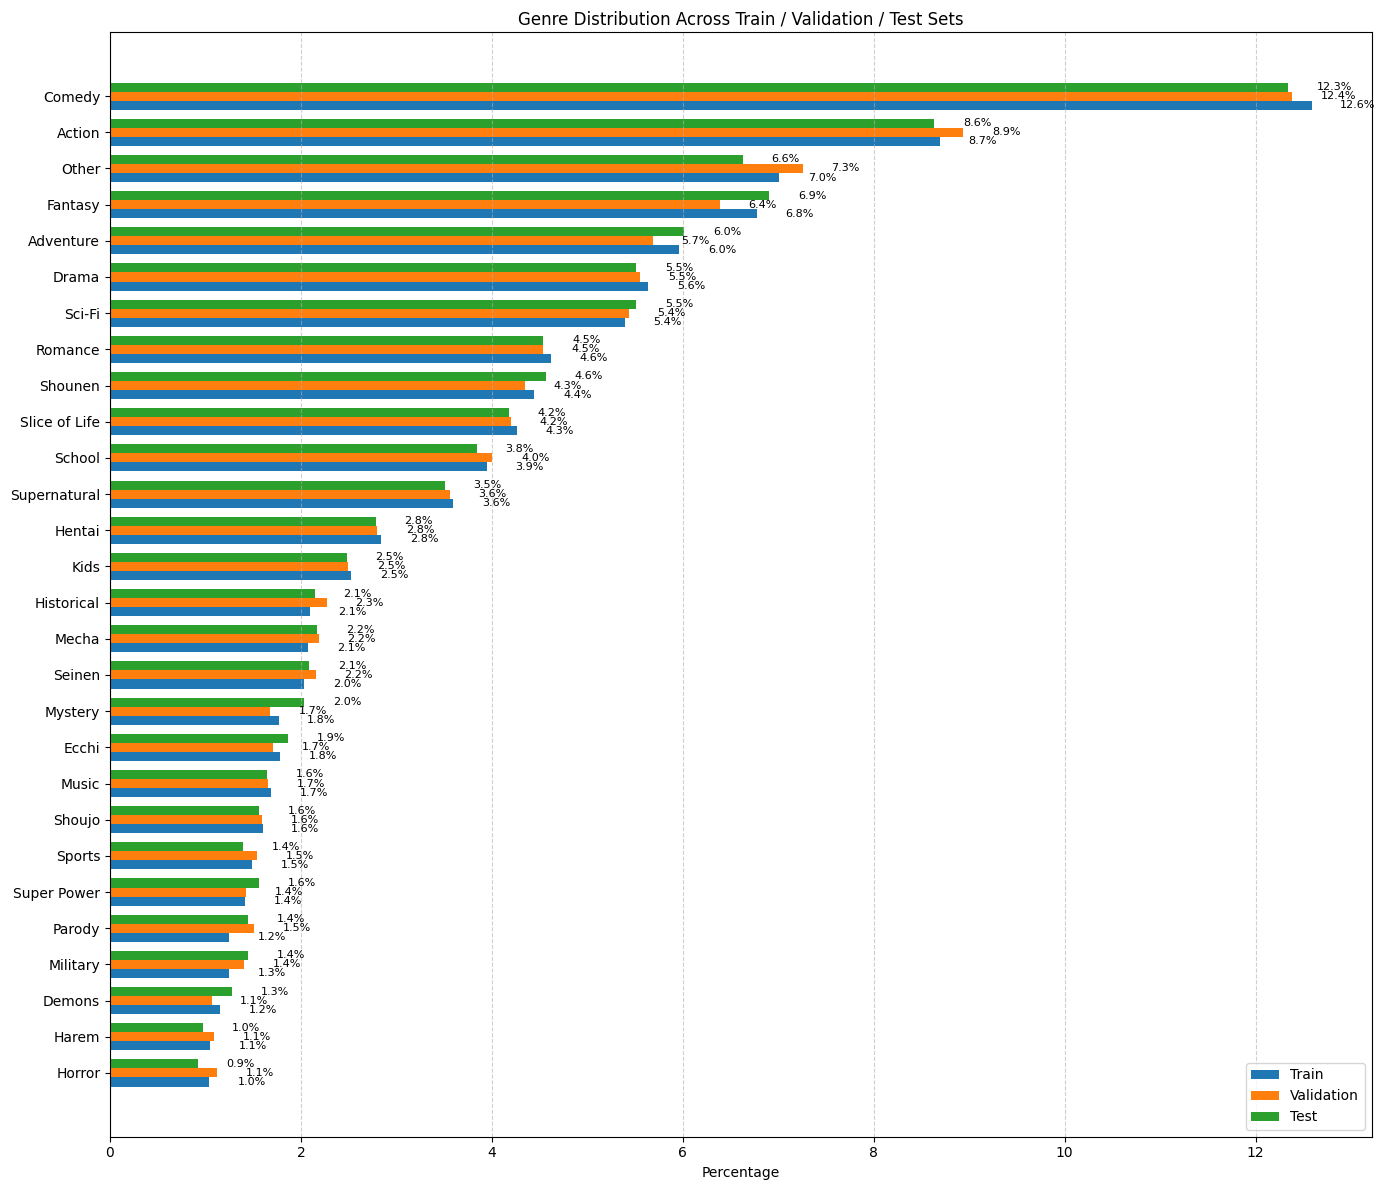

In [39]:
# from skmultilearn.model_selection import iterative_train_test_split

# Let's assume this is your main DataFrame
df = final_cleaned_dataset_df.copy()

# Step 1: One-hot encode genres
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genres'])  # assumes genre is a list
df['index'] = df.index  # store original indices

# Step 2: Prepare X for iterative split (with synopsis and index)
X = df[['synopsis', 'index']].values  # shape: (n_samples, 2)

# Step 3: Perform iterative train/test/val split
X_train, y_train, X_temp, y_temp = iterative_train_test_split(X, y, test_size=0.2)
X_val, y_val, X_test, y_test = iterative_train_test_split(X_temp, y_temp, test_size=0.5)

# Step 4: Rebuild DataFrames from indices
def rebuild_df(X_subset, y_subset, original_df, mlb):
    indices = [int(x[1]) for x in X_subset]  # extract indices
    df_part = original_df.loc[indices].copy()
    df_part['genres'] = mlb.inverse_transform(y_subset)
    return df_part.reset_index(drop=True)

df_train = rebuild_df(X_train, y_train, df, mlb)
df_val = rebuild_df(X_val, y_val, df, mlb)
df_test = rebuild_df(X_test, y_test, df, mlb)

display(df_train)
display(df_val)
display(df_test)

#Printing the distribution of the dataset genres

def label_dist(df_part):
    return pd.Series(np.sum(mlb.transform(df_part['genres']), axis=0), index=mlb.classes_)

print("Train label distribution:\n", label_dist(df_train))
print("Val label distribution:\n", label_dist(df_val))
print("Test label distribution:\n", label_dist(df_test))

#VERIFY SPLIT by plotting a horizontal bar chart

# Step 1: Function to compute percentage distribution
def compute_label_percentages(df):
    mlb = MultiLabelBinarizer()
    y = mlb.fit_transform(df['genres'])
    label_counts = np.sum(y, axis=0)
    label_percentages = label_counts / label_counts.sum() * 100
    return pd.Series(label_percentages, index=mlb.classes_)

# Step 2: Get distributions
train_dist = compute_label_percentages(df_train)
val_dist = compute_label_percentages(df_val)
test_dist = compute_label_percentages(df_test)

# Step 3: Combine into one DataFrame
combined_df = pd.DataFrame({
    'Train': train_dist,
    'Validation': val_dist,
    'Test': test_dist
}).fillna(0)

# Step 4: Sort by average for consistent plotting
combined_df = combined_df.loc[combined_df.mean(axis=1).sort_values().index]

# Step 5: Plot side-by-side horizontal bar chart with labels
plt.figure(figsize=(14, 12))
bar_width = 0.25
indices = np.arange(len(combined_df))

bars1 = plt.barh(indices - bar_width, combined_df['Train'], bar_width, label='Train')
bars2 = plt.barh(indices, combined_df['Validation'], bar_width, label='Validation')
bars3 = plt.barh(indices + bar_width, combined_df['Test'], bar_width, label='Test')

plt.yticks(indices, combined_df.index)
plt.xlabel('Percentage')
plt.title('Genre Distribution Across Train / Validation / Test Sets')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add text labels for each bar
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center', fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.show()



## Save the dataset as csv

In [40]:

# df_train.to_csv('df_train.csv', index=False)
# df_val.to_csv('df_val.csv', index=False)
# df_test.to_csv('df_test.csv', index=False)

# Word count baseline model CountVEctorizer BoW + Linear regression method


## Making functions for metric calculation

In [41]:
#Making changes to the threshol values to see how i affects
#Decreasing the threshold causes the F1-macro to increase
#This may be due to it making more predictions that causes it to be more leanient and correct
def LR_OVA_prob(xtest,threshold,classifier):
    y_pred_prob = classifier.predict_proba(xtest)
    t=threshold
    y_pred_new = (y_pred_prob >= t).astype(int)
    return y_pred_new

def print_report(y_true, y_pred,avg_type,metric, mlb):
    report=classification_report(y_true, y_pred, target_names=mlb.classes_,output_dict=True)
    metric_val=report[avg_type][metric]
    print(avg_type,metric,"=",metric_val)
    return metric_val

# y_pred_val=LR_OVA_prob(X_val,0.5)
# print_report(y_val,y_pred_val,"samples avg","f1-score")


# # predict probabilities
# y_pred_prob = classifier.predict_proba(X_test)
# t = 0.6 # threshold value
# y_pred_new = (y_pred_prob >= t).astype(int)
# #print(y_pred_new)
# report = classification_report(y_test, y_pred_test, target_names=mlb.classes_,output_dict=True)
# macro_f1 = report['samples avg']['recall']
# print("Macro F1-score:", macro_f1)

In [42]:
# Convert predictions and ground truth from binary to label format

def result_table(y_true,y_pred,df,mlb):
    actual_genres = mlb.inverse_transform(y_true)
    predicted_genres = mlb.inverse_transform(y_pred)
    # Create a new DataFrame to display results
    results_df = pd.DataFrame({
    'Synopsis': df['synopsis'],
    'Actual Genres': actual_genres,
    'Predicted Genres': predicted_genres
    })
    return results_df

# result_table(y_test,y_pred_test,df_test)
# result_table(y_train,y_pred_train,df_train)

# actual_genres = mlb.inverse_transform(y_test)
# predicted_genres = mlb.inverse_transform(y_pred_test)

# # Create a new DataFrame to display results
# results_df = pd.DataFrame({
#     'Synopsis': df_test['synopsis'],
#     'Actual Genres': actual_genres,
#     'Predicted Genres': predicted_genres
# })

# # Optional: visually inspect the first few rows
# results_df

In [43]:
#from sklearn.metrics import jaccard_score
#Calculating jaccard score
# jaccard = jaccard_score(y_test, y_pred_test, average='samples')
# print("Jaccard Similarity:", jaccard)

#Calculating hit rate
def hit_rate(y_true, y_pred):
    hits = np.logical_and(y_true, y_pred).sum(axis=1) > 0
    return hits.mean()


# hr = hit_rate(y_test, y_pred_test)
# print("Hit Rate:", hr)



## Model

In [45]:
#Parameters that can be changed:
#Number of wordds in vocublary
#Class weighting

# from sklearn.feature_extraction.text import CountVectorizer
mlb=MultiLabelBinarizer()
y_train = mlb.fit_transform(df_train['genres'])
#display(y)
vectorizer = CountVectorizer(stop_words='english', max_features=1000, ngram_range=(1,2))
X_train = vectorizer.fit_transform(df_train['synopsis'])
#display(X_train)
#print(vectorizer.get_feature_names_out(),len(vectorizer.get_feature_names_out()))
#print(X_train.toarray())

y_val= mlb.fit_transform(df_val['genres'])
X_val = vectorizer.fit_transform(df_val['synopsis'])
y_test= mlb.fit_transform(df_test['genres'])
X_test = vectorizer.fit_transform(df_test['synopsis'])

# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(class_weight="balanced",max_iter=1000)) #Already tried with balanced class but it is worse
classifier.fit(X_train, y_train)                                    #At least when it is not balanced it can overfit the train class

# from sklearn.metrics import classification_report
#samples	How well did we predict each movie's genres?	✅ Best for your task
#micro	    Overall genre prediction accuracy	            ✅ Good for global view
#macro	    Equal focus on rare and frequent genres	        ⚠️ Careful with imbalance
#weighted	Genre performance balanced by frequency	        ✅ Fair but skew-sensitive
#USE SAMPLES


print("Report for Train dataset")
threshold=0.5
y_pred_train=LR_OVA_prob(X_train,threshold,classifier)
print_report(y_train,y_pred_train,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_train, y_pred_train, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_train, y_pred_train)
print("Hit Rate:", hr)

print("----------------------")
print("Report for Val dataset")
y_pred_val=LR_OVA_prob(X_val,threshold,classifier)
print_report(y_val,y_pred_val,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_val, y_pred_val, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_val, y_pred_val)
print("Hit Rate:", hr)

print("----------------------")
print("Report for Test dataset")
y_pred_test=LR_OVA_prob(X_test,threshold,classifier)
print_report(y_test,y_pred_test,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_test, y_pred_test, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_val, y_pred_val)
print("Hit Rate:", hr)



display(result_table(y_train,y_pred_train,df_train,mlb))
display(result_table(y_val,y_pred_val,df_val,mlb))
display(result_table(y_test,y_pred_test,df_test,mlb))



# print("samples F1-score:", samples_f1)
# print("Report for Val datset")
# y_pred_val=classifier.predict(X_val)
# report=classification_report(y_val, y_pred_val, target_names=mlb.classes_,output_dict=True)
# samples_f1 = report['samples avg']['f1-score']
# print("samples F1-score:", samples_f1)
# print("Report for Test dataset")
# y_pred_test=classifier.predict(X_test)
# report=classification_report(y_test, y_pred_test, target_names=mlb.classes_,output_dict=True)
# samples_f1 = report['samples avg']['f1-score']
# print("samples F1-score:", samples_f1)


# print("Report for Train dataset")
# y_pred_train = classifier.predict(X_train)
# report = classification_report(y_train, y_pred_train, target_names=mlb.classes_,output_dict=True)
# samples_f1 = report['samples avg']['f1-score']
# print("samples F1-score:", samples_f1)
# print("Report for Val datset")
# y_pred_val=classifier.predict(X_val)
# report=classification_report(y_val, y_pred_val, target_names=mlb.classes_,output_dict=True)
# samples_f1 = report['samples avg']['f1-score']
# print("samples F1-score:", samples_f1)
# print("Report for Test dataset")
# y_pred_test=classifier.predict(X_test)
# report=classification_report(y_test, y_pred_test, target_names=mlb.classes_,output_dict=True)
# samples_f1 = report['samples avg']['f1-score']
# print("samples F1-score:", samples_f1)

Report for Train dataset
samples avg f1-score = 0.5594906610314193
Jaccard Similarity: 0.4269541213439451
Hit Rate: 0.9491249048809653
----------------------
Report for Val dataset
samples avg f1-score = 0.20333042180896335
Jaccard Similarity: 0.12697016182529788
Hit Rate: 0.6163301141352063
----------------------
Report for Test dataset
samples avg f1-score = 0.2124237831535724
Jaccard Similarity: 0.13299527168275205
Hit Rate: 0.6163301141352063


c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Synopsis,Actual Genres,Predicted Genres
0,"Sometime in the future, the world was complete...","(Action, Adventure)","(Adventure, Fantasy, Sci-Fi)"
1,"Set in 2014, the anime follows the adventures ...","(Comedy,)","(Comedy, Fantasy, Shounen, Slice of Life)"
2,Follows a pig whose family's mission is to col...,"(Comedy, Kids)","(Comedy, Ecchi, Kids, Slice of Life)"
3,"In honor of the 2018 World Cup, this season of...","(Kids, Sci-Fi, Sports, Super Power)","(Action, Drama, Kids, Sci-Fi, Sports, Super Po..."
4,"Fairies living in a fluffy forest, where both ...","(Fantasy, Kids)","(Comedy, Fantasy, Horror, Kids)"
...,...,...,...
9194,The Konohagakure Grand Sports Festival has beg...,"(Action, Comedy, Fantasy, Other, Shounen, Sports)","(Action, Adventure, Comedy, Drama, Fantasy, Ot..."
9195,Special bundled with the Blu-ray/DVD volume of .,"(Ecchi,)","(Comedy, Ecchi, Fantasy, Harem, Music, School,..."
9196,"According to the official Hobby Japan website,...","(Comedy, Ecchi, Fantasy, Parody)","(Action, Comedy, Ecchi, Fantasy, Music, Seinen..."
9197,A series of comedic shorts featuring chibi ver...,"(Adventure, Comedy, Fantasy, Parody)","(Comedy, Kids, Music, Parody)"


,Synopsis,Actual Genres,Predicted Genres
0,The daily life of the Motsumoto family. The th...,"(Comedy, Slice of Life)","(Harem, Military, Other, Romance, Sci-Fi)"
1,Himeno Mimika is a daughter of historical cook...,"(Kids, Other, Slice of Life)","(Ecchi, Sci-Fi, Shounen)"
2,"An elite soldier, whose nickname is God of Dea...","(Action, Adventure, Comedy, Romance, Sci-Fi)","(Drama, Romance, Sci-Fi)"
3,"The third show in the Virtual Trilogy, a mix o...","(Adventure, Shounen)","(Adventure, Comedy, Horror, Mystery, Romance, ..."
4,The offensive and defensive battles between No...,"(Comedy,)","(Ecchi, Other, Parody, School, Sports)"
...,...,...,...
1134,"At Anime Japan 2018, Warner Bros. announced a ...","(Other, Parody)","(Drama, Mystery, Seinen, Sports)"
1135,Specials included in the OVA of Hyakujitsu no ...,"(Other, Parody)","(Hentai, Military, Music, Slice of Life)"
1136,Three episodes aired on TV as part of the Ribo...,"(Shoujo,)","(Comedy, Ecchi, Fantasy)"
1137,The Future Foundation is in shambles after the...,"(Action, Horror, Mystery, Other)","(Action, Comedy, Drama, Ecchi, Other, Supernat..."


,Synopsis,Actual Genres,Predicted Genres
0,Shuramaru is hated and feared by the villagers...,"(Supernatural,)","(Ecchi, Kids, Slice of Life)"
1,"The Soul Tree, the great source of our race. ...","(Action, Adventure, Kids)","(Action, Adventure, Comedy, Drama, Fantasy, Sh..."
2,The story begins 15 years after the demon king...,"(Comedy, Fantasy, Slice of Life)","(Action, Drama, Fantasy, Romance, Sci-Fi, Shou..."
3,The third generation of J SOUL BROTHERS from E...,"(Kids, Music)","(Adventure, Comedy, Demons, Drama, Parody, Sch..."
4,A cyborg warrior from an ancient Antarctic kin...,"(Action, Mecha, Sci-Fi)","(Action, Drama, Historical, Sci-Fi, Shounen)"
...,...,...,...
1117,Short specials involving the characters from t...,"(Harem,)","(Comedy, Ecchi, Music, Parody, Shounen)"
1118,Three episodes aired on TV as part of the Ribo...,"(Shoujo, Supernatural)","(Adventure, Horror, Kids, Other, Slice of Life)"
1119,Short mini-theater specials included in the BD...,"(Slice of Life, Supernatural)","(Comedy, Demons, Fantasy, Horror, Shoujo, Slic..."
1120,DVD/BD specials featuring two female cast memb...,"(Ecchi, Seinen)","(Adventure, Comedy, Drama, Historical, Music, ..."


## Testing new infference

In [46]:
#Predict new genres from user infference

new_synopsis = ["A naive but strong boy named Goku sets off to find seven mystical Dragon Balls, sparking a wild adventure filled with martial arts, quirky allies, strange foes, and a journey of growth across a fantastical world."]

X_new = vectorizer.transform(new_synopsis)
y_pred=LR_OVA_prob(X_new,0.5,classifier)
predicted_genres = mlb.inverse_transform(y_pred)
print(predicted_genres)

# X_new = vectorizer.transform(new_synopsis)
# y_pred_prob = classifier.predict_proba(X_new)
# t = 0.5 # threshold value
# y_pred_new = (y_pred_prob >= t).astype(int)
# y_pred = classifier.predict(X_new)
# display(y_pred_new)
# # Convert predictions back to genre labels
# predicted_genres = mlb.inverse_transform(y_pred_new)
# print(predicted_genres)

[('Drama', 'Ecchi', 'Romance', 'Sci-Fi')]


# Word count baseline model TF-IDF BoW + Linear regression method

In [47]:
#Parameters that can be changed:
#Number of wordds in vocublary
#Class weighting

# from sklearn.feature_extraction.text import CountVectorizer
mlb=MultiLabelBinarizer()
y_train = mlb.fit_transform(df_train['genres'])
#display(y)
vectorizer = TfidfVectorizer(stop_words="english",max_features=5000,ngram_range=(1,2))
X_train = vectorizer.fit_transform(df_train['synopsis'])
#display(X_train)
#print(vectorizer.get_feature_names_out(),len(vectorizer.get_feature_names_out()))
#print(X_train.toarray())

y_val= mlb.fit_transform(df_val['genres'])
X_val = vectorizer.fit_transform(df_val['synopsis'])
y_test= mlb.fit_transform(df_test['genres'])
X_test = vectorizer.fit_transform(df_test['synopsis'])

# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(class_weight="balanced",max_iter=1000)) #Already tried with balanced class but it is worse
classifier.fit(X_train, y_train)                                    #At least when it is not balanced it can overfit the train class

# from sklearn.metrics import classification_report
#samples	How well did we predict each movie's genres?	✅ Best for your task
#micro	    Overall genre prediction accuracy	            ✅ Good for global view
#macro	    Equal focus on rare and frequent genres	        ⚠️ Careful with imbalance
#weighted	Genre performance balanced by frequency	        ✅ Fair but skew-sensitive
#USE SAMPLES


print("Report for Train dataset")
threshold=0.5
y_pred_train=LR_OVA_prob(X_train,threshold,classifier)
print_report(y_train,y_pred_train,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_train, y_pred_train, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_train, y_pred_train)
print("Hit Rate:", hr)

print("----------------------")
print("Report for Val dataset")
y_pred_val=LR_OVA_prob(X_val,threshold,classifier)
print_report(y_val,y_pred_val,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_val, y_pred_val, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_val, y_pred_val)
print("Hit Rate:", hr)

print("----------------------")
print("Report for Test dataset")
y_pred_test=LR_OVA_prob(X_test,threshold,classifier)
print_report(y_test,y_pred_test,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_test, y_pred_test, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_val, y_pred_val)
print("Hit Rate:", hr)



display(result_table(y_train,y_pred_train,df_train,mlb))
display(result_table(y_val,y_pred_val,df_val,mlb))
display(result_table(y_test,y_pred_test,df_test,mlb))

Report for Train dataset
samples avg f1-score = 0.7130053519112752
Jaccard Similarity: 0.5968898353663641
Hit Rate: 0.9818458528100881
----------------------
Report for Val dataset
samples avg f1-score = 0.1342735403314859
Jaccard Similarity: 0.08966315608106652
Hit Rate: 0.32660228270412645
----------------------
Report for Test dataset
samples avg f1-score = 0.14412021430738006
Jaccard Similarity: 0.09742317496328191
Hit Rate: 0.32660228270412645


c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Synopsis,Actual Genres,Predicted Genres
0,"Sometime in the future, the world was complete...","(Action, Adventure)","(Action, Adventure, Fantasy, Sci-Fi)"
1,"Set in 2014, the anime follows the adventures ...","(Comedy,)","(Comedy, Mystery, Other, Slice of Life)"
2,Follows a pig whose family's mission is to col...,"(Comedy, Kids)","(Comedy, Kids, Slice of Life)"
3,"In honor of the 2018 World Cup, this season of...","(Kids, Sci-Fi, Sports, Super Power)","(Kids, Sci-Fi, Sports, Super Power)"
4,"Fairies living in a fluffy forest, where both ...","(Fantasy, Kids)","(Fantasy, Kids, Slice of Life)"
...,...,...,...
9194,The Konohagakure Grand Sports Festival has beg...,"(Action, Comedy, Fantasy, Other, Shounen, Sports)","(Action, Adventure, Comedy, Other, Shounen, Sp..."
9195,Special bundled with the Blu-ray/DVD volume of .,"(Ecchi,)","(Comedy, Ecchi, Fantasy, Harem, School, Slice ..."
9196,"According to the official Hobby Japan website,...","(Comedy, Ecchi, Fantasy, Parody)","(Comedy, Ecchi, Music, Parody, Slice of Life)"
9197,A series of comedic shorts featuring chibi ver...,"(Adventure, Comedy, Fantasy, Parody)","(Adventure, Comedy, Fantasy, Parody, School)"


,Synopsis,Actual Genres,Predicted Genres
0,The daily life of the Motsumoto family. The th...,"(Comedy, Slice of Life)","(Comedy, Fantasy, Slice of Life)"
1,Himeno Mimika is a daughter of historical cook...,"(Kids, Other, Slice of Life)","(School,)"
2,"An elite soldier, whose nickname is God of Dea...","(Action, Adventure, Comedy, Romance, Sci-Fi)",()
3,"The third show in the Virtual Trilogy, a mix o...","(Adventure, Shounen)","(Drama, Fantasy, Historical)"
4,The offensive and defensive battles between No...,"(Comedy,)","(Hentai, Other)"
...,...,...,...
1134,"At Anime Japan 2018, Warner Bros. announced a ...","(Other, Parody)","(Drama,)"
1135,Specials included in the OVA of Hyakujitsu no ...,"(Other, Parody)","(Hentai,)"
1136,Three episodes aired on TV as part of the Ribo...,"(Shoujo,)","(Slice of Life,)"
1137,The Future Foundation is in shambles after the...,"(Action, Horror, Mystery, Other)","(Comedy, Seinen)"


,Synopsis,Actual Genres,Predicted Genres
0,Shuramaru is hated and feared by the villagers...,"(Supernatural,)","(Hentai,)"
1,"The Soul Tree, the great source of our race. ...","(Action, Adventure, Kids)","(Comedy, Fantasy)"
2,The story begins 15 years after the demon king...,"(Comedy, Fantasy, Slice of Life)","(Action, Comedy, Ecchi, Other, Sci-Fi, Slice o..."
3,The third generation of J SOUL BROTHERS from E...,"(Kids, Music)","(Adventure,)"
4,A cyborg warrior from an ancient Antarctic kin...,"(Action, Mecha, Sci-Fi)","(Horror, Seinen)"
...,...,...,...
1117,Short specials involving the characters from t...,"(Harem,)","(Comedy, Hentai, Parody)"
1118,Three episodes aired on TV as part of the Ribo...,"(Shoujo, Supernatural)","(Comedy, Parody)"
1119,Short mini-theater specials included in the BD...,"(Slice of Life, Supernatural)","(Comedy, Sports)"
1120,DVD/BD specials featuring two female cast memb...,"(Ecchi, Seinen)","(Comedy, Shounen, Sports)"


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer